In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('Car Details.csv')

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
df.keys()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df.shape

(4340, 8)

In [ ]:
print (df.dtypes)

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [ ]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [ ]:
df.duplicated().sum()

763

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df.drop(columns=['name'], inplace=True)

<ipython-input-24-eccd9419c7f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['name'], inplace=True)


In [ ]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
T=df['year'].value_counts()
T

,count
year,
2017,346
2012,338
2015,332
2014,321
2013,298
2018,295
2016,283
2011,247
2010,210


<BarContainer object of 27 artists>

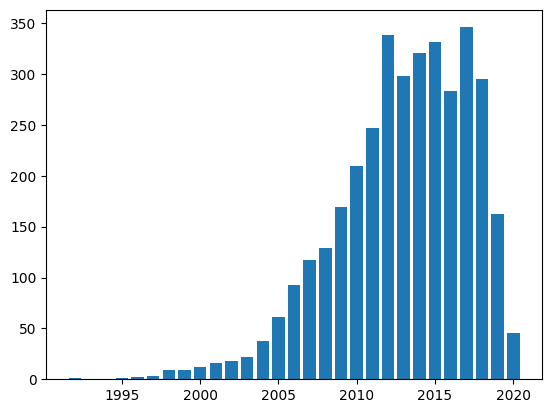

In [ ]:
plt.bar(T.index, T.values)

In [ ]:
F=df['fuel'].value_counts()
F

,count
fuel,
Diesel,1800
Petrol,1717
CNG,37
LPG,22
Electric,1


<BarContainer object of 5 artists>

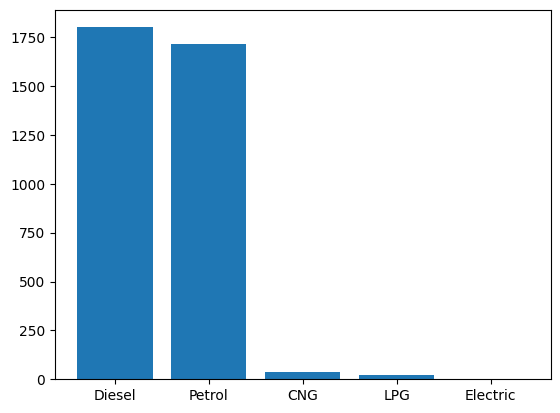

In [ ]:
plt.bar(F.index, F.values)

In [ ]:
S=df['seller_type'].value_counts()
S

,count
seller_type,
Individual,2832
Dealer,712
Trustmark Dealer,33


<BarContainer object of 3 artists>

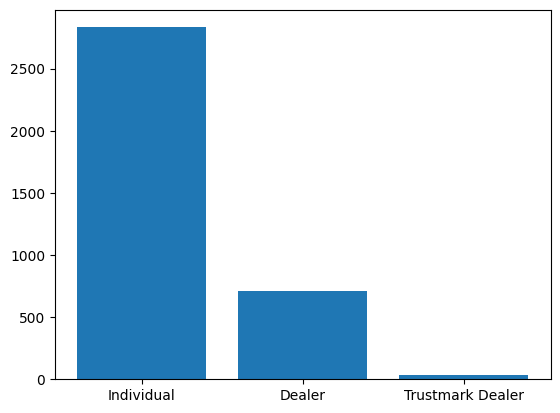

In [ ]:
plt.bar(S.index, S.values)

In [ ]:
R=df['transmission'].value_counts()
R

,count
transmission,
Manual,3265
Automatic,312


<BarContainer object of 2 artists>

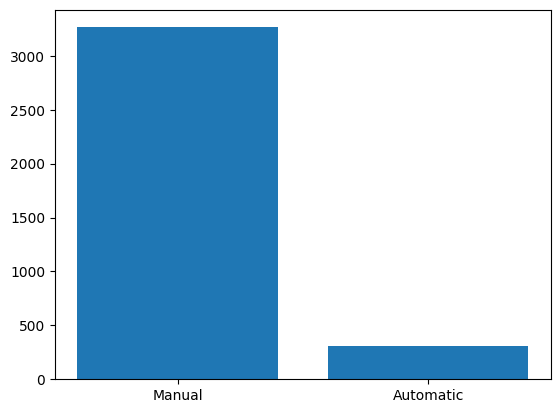

In [ ]:
plt.bar(R.index, R.values)

In [ ]:
O=df['owner'].value_counts()
O

,count
owner,
First Owner,2218
Second Owner,978
Third Owner,289
Fourth & Above Owner,75
Test Drive Car,17


<BarContainer object of 5 artists>

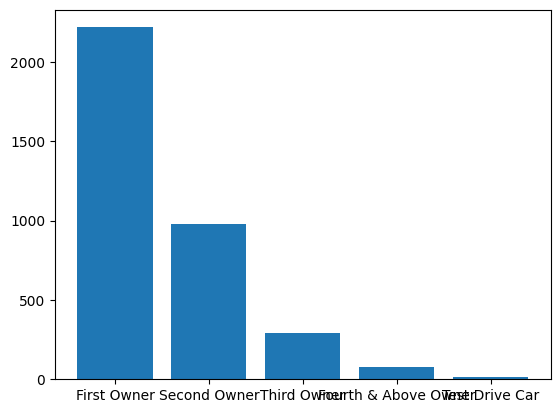

In [ ]:
plt.bar(O.index, O.values)

In [ ]:
df=pd.get_dummies(df, columns=['fuel', 'seller_type', 'owner'], dtype=int)
df

,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,Manual,0,0,0,0,1,0,1,0,1,0,0,0,0
1,2007,135000,50000,Manual,0,0,0,0,1,0,1,0,1,0,0,0,0
2,2012,600000,100000,Manual,0,1,0,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,Manual,0,0,0,0,1,0,1,0,1,0,0,0,0
4,2014,450000,141000,Manual,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Manual,0,1,0,0,0,0,1,0,0,0,1,0,0
4336,2014,409999,80000,Manual,0,1,0,0,0,0,1,0,0,0,1,0,0
4337,2009,110000,83000,Manual,0,0,0,0,1,0,1,0,0,0,1,0,0
4338,2016,865000,90000,Manual,0,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
df['transmission']=df['transmission'].map({'Manual':1, 'Automatic':0})

In [ ]:
df

,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,1,0,0,0,0,1,0,1,0,1,0,0,0,0
1,2007,135000,50000,1,0,0,0,0,1,0,1,0,1,0,0,0,0
2,2012,600000,100000,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,1,0,0,0,0,1,0,1,0,1,0,0,0,0
4,2014,450000,141000,1,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4336,2014,409999,80000,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4337,2009,110000,83000,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4338,2016,865000,90000,1,0,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
df.corr()

,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
year,1.000000,0.424260,-0.417490,-0.116692,0.008051,0.115800,-0.027388,-0.051457,-0.108551,0.140269,-0.153833,0.067571,0.442652,-0.181847,-0.288943,0.106746,-0.247144
selling_price,0.424260,1.000000,-0.187359,-0.486269,-0.040303,0.276873,-0.005383,-0.046668,-0.261443,0.175024,-0.187640,0.066012,0.229482,-0.084116,-0.158960,0.065189,-0.120963
km_driven,-0.417490,-0.187359,1.000000,0.101387,-0.005801,0.299145,-0.002549,0.033680,-0.303389,-0.132437,0.142546,-0.052344,-0.297612,0.096649,0.192028,-0.094556,0.189044
transmission,-0.116692,-0.486269,0.101387,1.000000,0.031603,-0.025755,-0.054096,0.024318,0.017379,-0.141183,0.148879,-0.042713,-0.068460,0.031408,0.047360,0.006955,0.026205
fuel_CNG,0.008051,-0.040303,-0.005801,0.031603,1.000000,-0.102894,-0.001710,-0.008042,-0.098226,0.011316,-0.008804,-0.009865,-0.022445,0.042895,0.017877,-0.007065,-0.010031
fuel_Diesel,0.115800,0.276873,0.299145,-0.025755,-0.102894,1.000000,-0.016830,-0.079174,-0.966988,0.026202,-0.022175,-0.015241,-0.007063,-0.022405,0.013618,-0.012639,0.005275
fuel_Electric,-0.027388,-0.005383,-0.002549,-0.054096,-0.001710,-0.016830,1.000000,-0.001316,-0.016067,0.033545,-0.032604,-0.001614,-0.021363,-0.002447,0.027261,-0.001156,-0.004958
fuel_LPG,-0.051457,-0.046668,0.033680,0.024318,-0.008042,-0.079174,-0.001316,1.000000,-0.075582,-0.030261,0.031542,-0.007591,-0.026828,0.013445,0.023947,-0.005436,0.002920
fuel_Petrol,-0.108551,-0.261443,-0.303389,0.017379,-0.098226,-0.966988,-0.016067,-0.075582,1.000000,-0.024901,0.020130,0.018493,0.016527,0.011714,-0.021909,0.014969,-0.003538
seller_type_Dealer,0.140269,0.175024,-0.132437,-0.141183,0.011316,0.026202,0.033545,-0.030261,-0.024901,1.000000,-0.971955,-0.048105,0.208458,-0.063181,-0.151858,0.138619,-0.124672


<Axes: >

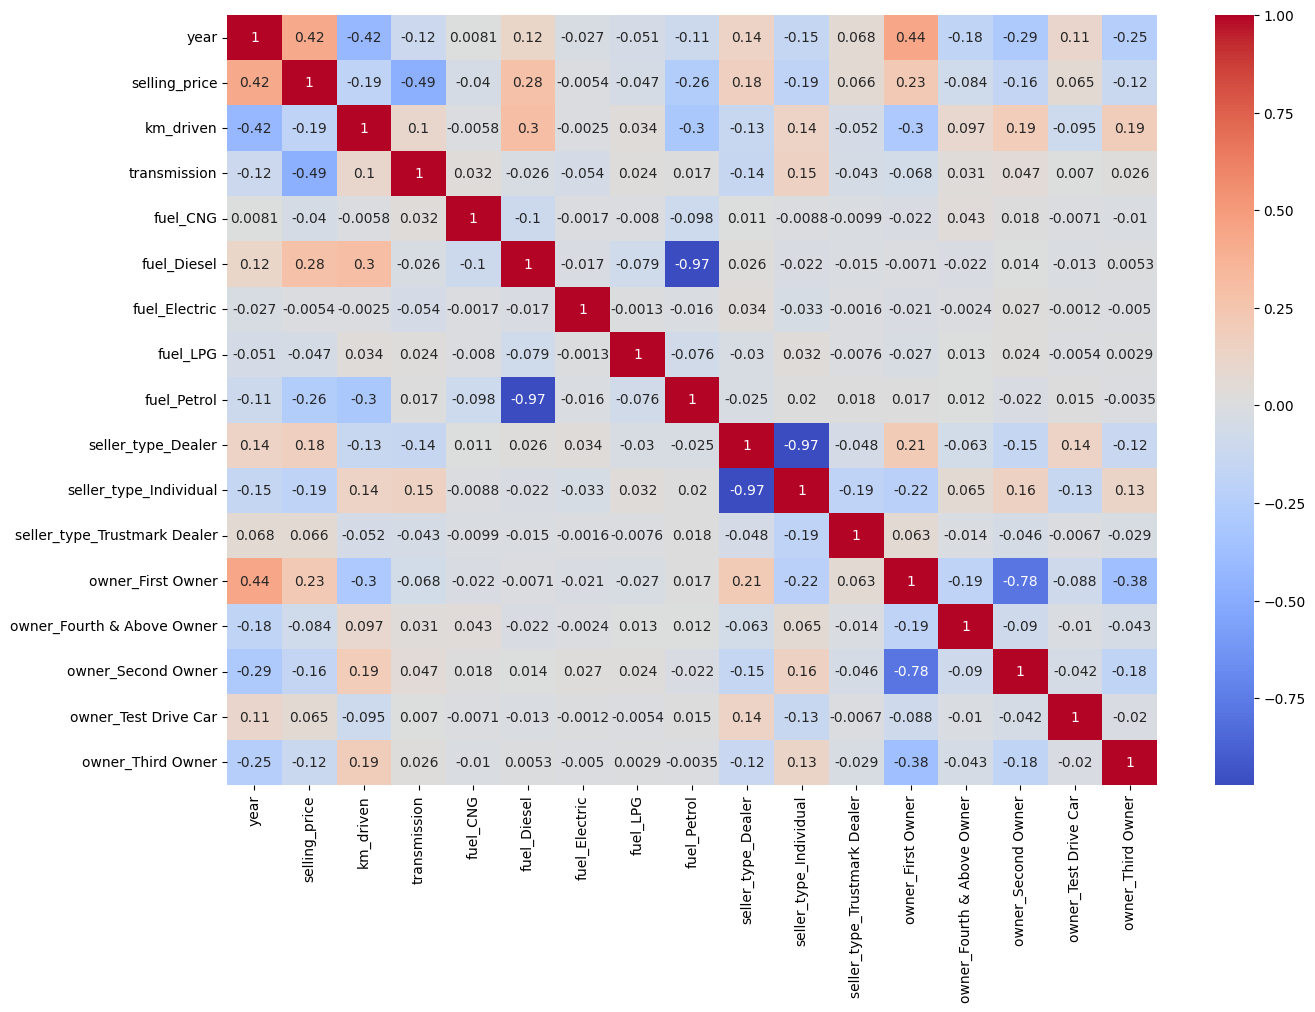

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2861, 16), (716, 16), (2861,), (716,))

In [54]:
y_train.value_counts()

,count
selling_price,
300000,106
250000,93
350000,79
500000,71
550000,69
...,...
596000,1
1140000,1
980000,1


In [55]:
y.value_counts()

,count
selling_price,
300000,137
250000,112
350000,106
500000,87
600000,84
...,...
2595000,1
368000,1
248000,1


In [57]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [58]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  110219442304.96423
Root Mean Squared Error:  331993.13593049516
Mean Absolute Error:  198972.9311362092
R2 Score:  0.4563100717173577


In [59]:
import pickle

pickle.dump(model, open('model_car.pkl', 'wb'))

In [ ]:
pickle.dump(X.columns, open("feature_columns.pkl", "wb"))